In [ ]:
!pip install yfinance
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


#CNN

## CNN 10 years

[*********************100%***********************]  1 of 1 completed


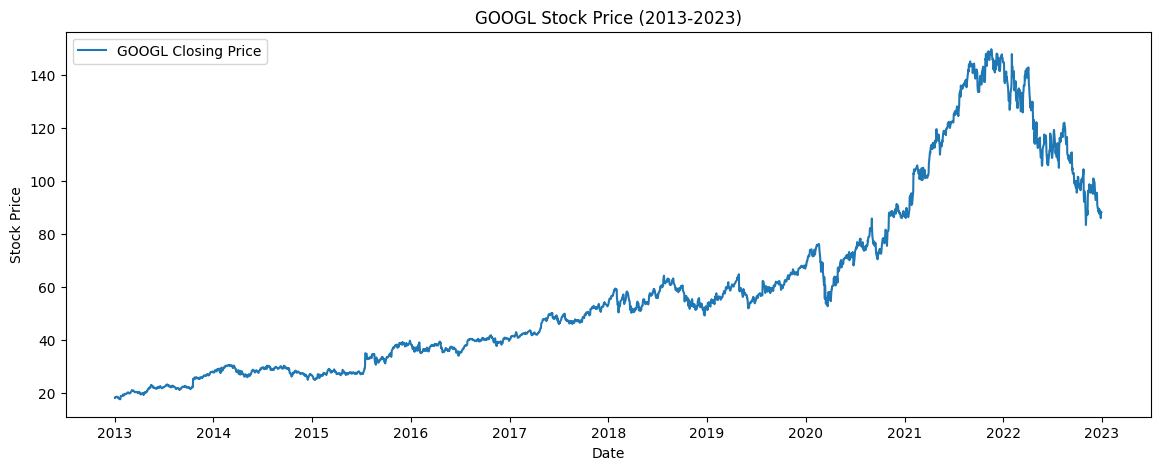

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2013-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='GOOGL Closing Price')
plt.title('GOOGL Stock Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

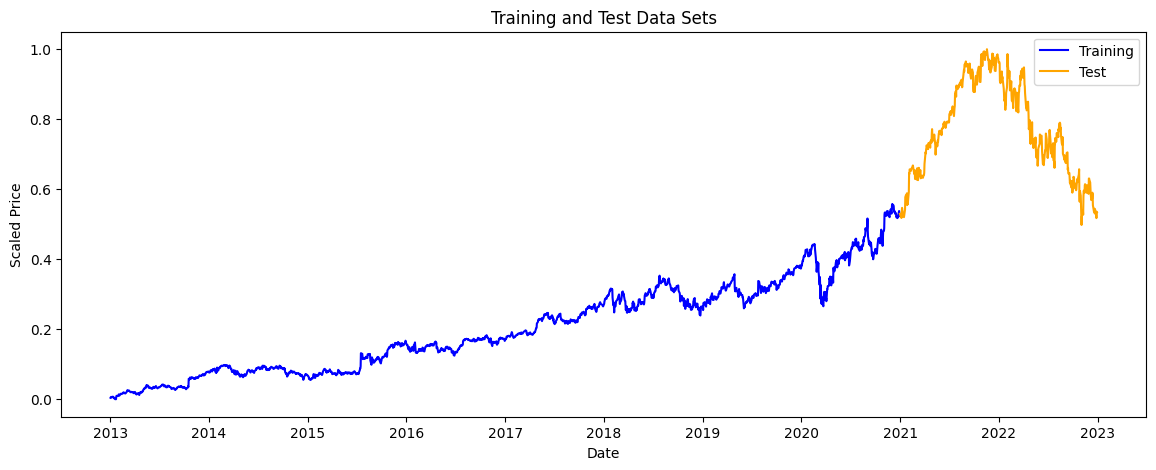

In [ ]:
# 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [ ]:
# min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 0.5569725903540566
Test Data - Min: 0.4978531483400648 Max: 1.0


In [ ]:
# Training Data
train_start_date = df.index[0]  # Starting date of the training set
train_end_date = df.index[q_80 - 1]  # Ending date of the training set

# Test Data
test_start_date = df.index[q_80]  # Starting date of the test set
test_end_date = df.index[-1]  # Ending date of the test set

# Print the start and end dates for each dataset
print("Training Data - Start Date:", train_start_date, ", End Date:", train_end_date)
print("Test Data - Start Date:", test_start_date, ", End Date:", test_end_date)

Training Data - Start Date: 2013-01-02 00:00:00 , End Date: 2020-12-30 00:00:00
Test Data - Start Date: 2020-12-31 00:00:00 , End Date: 2022-12-30 00:00:00


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (2007, 7, 1)
X_test shape: (497, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0258 - mean_absolute_error: 0.1185 - mse: 0.0258
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6066e-04 - mean_absolute_error: 0.0181 - mse: 5.6066e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3275e-04 - mean_absolute_error: 0.0078 - mse: 1.3275e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2454e-04 - mean_absolute_error: 0.0076 - mse: 1.2454e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2816e-04 - mean_absolute_error: 0.0076 - mse: 1.2816e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3024e-04 - mean_absolute_error: 0.0076 - mse: 1.3024e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2502e-04 - mean_absolute_error: 0.0076 - mse: 1.2502e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4374e-04 - mean_absolute_error: 0.0078 - mse: 1.4374e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3413e-04 - mean_absolut

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE: 8.001764975178215
MAE: 6.772399119448134
MSE: 64.02824271798883
Accuracy Percentage (R-squared): 79.38%


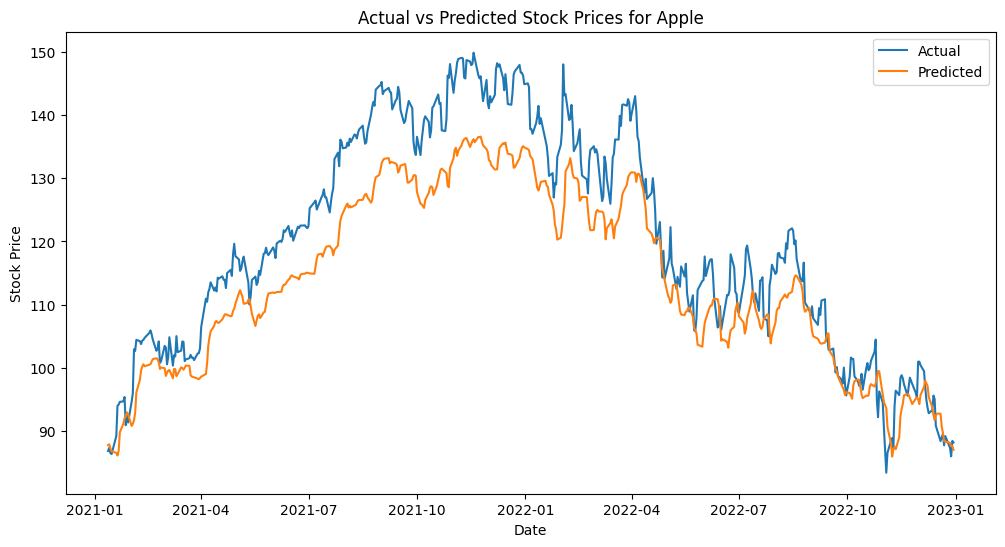

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN 5

[*********************100%***********************]  1 of 1 completed


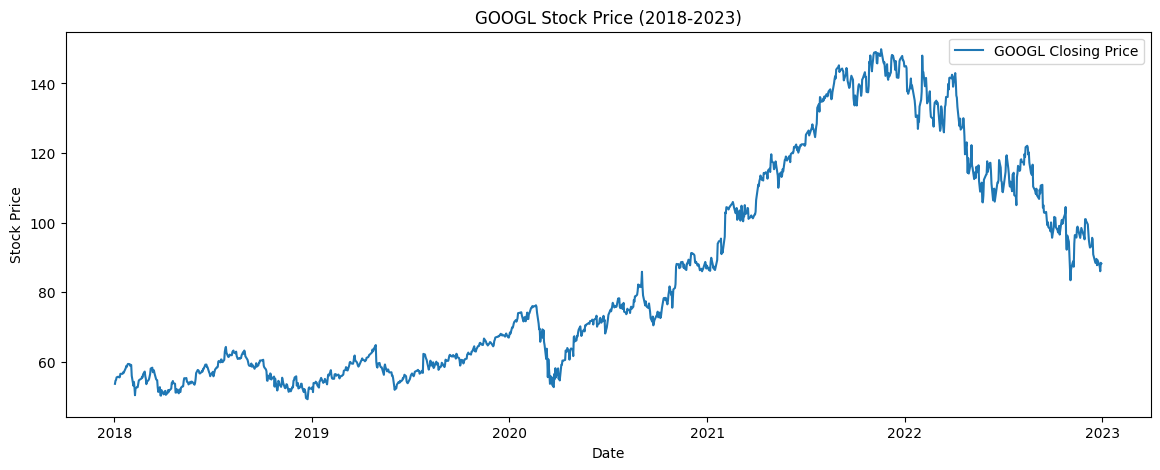

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2018-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='GOOGL Closing Price')
plt.title('GOOGL Stock Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

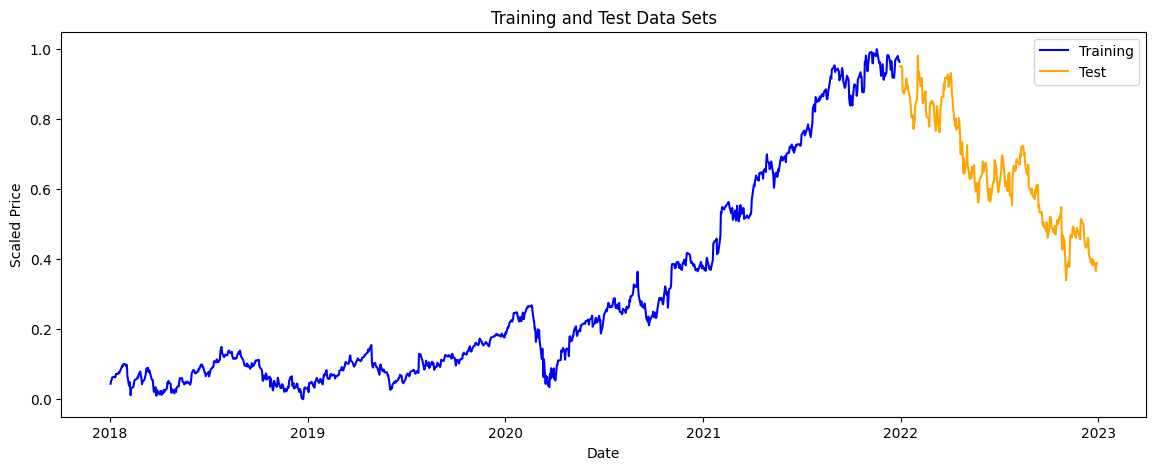

In [ ]:
# Define split points for the 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


In [ ]:
# Calculate and print the min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 1.0
Test Data - Min: 0.3399085435758401 Max: 0.981725550569774


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1000, 7, 1)
X_test shape: (245, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0817 - mean_absolute_error: 0.1895 - mse: 0.0817
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - mean_absolute_error: 0.0806 - mse: 0.0079
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0292 - mse: 0.0013
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9218e-04 - mean_absolute_error: 0.0178 - mse: 5.9218e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3654e-04 - mean_absolute_error: 0.0182 - mse: 6.3654e-04 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9022e-04 - mean_absolute_error: 0.0182 - mse: 5.9022e-04 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7822e-04 - mean_absolute_error: 0.0177 - mse: 5.7822e-04 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2004e-04 - mean_absolute_error: 0.0185 - mse: 6.2004e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8815e-04 - mean_absolute_error: 0.01

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 5.029564558783732
MAE: 4.134527681311783
MSE: 25.296519650973398
Accuracy Percentage (R-squared): 89.82%


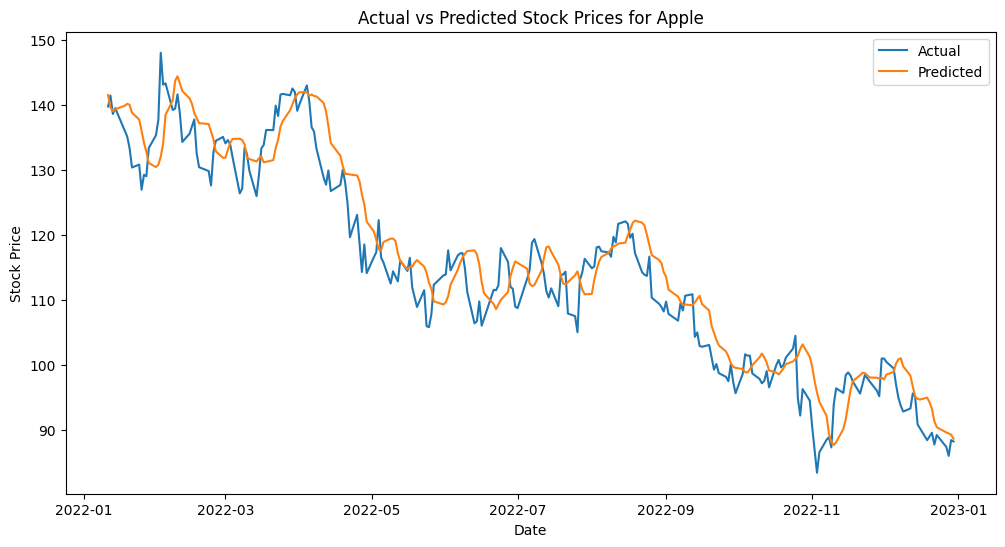

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN feature Engineering

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2018-01-01', end='2023-01-01')

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop any missing values
df.dropna(inplace=True)

# Print the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Close_Lagged_1,Close_Lagged_2,Close_Lagged_3,Close_Lagged_4,Close_Lagged_5
Date,,,,,,,,,,,,,,
2018-10-16,55.674000,56.818501,55.587502,56.653999,56.589054,38378000,59.91335,56.838365,42.104989,55.122002,56.027000,54.536999,54.608002,57.258499
2018-10-17,57.000000,57.349998,55.700001,56.379501,56.314869,35652000,59.78510,56.851960,40.990689,56.653999,55.122002,56.027000,54.536999,54.608002
2018-10-18,56.500000,56.617500,54.317001,54.895500,54.832569,46152000,59.62168,56.853557,35.518044,56.379501,56.653999,55.122002,56.027000,54.536999
2018-10-19,55.185501,56.047501,54.851501,55.258999,55.195652,41286000,59.46240,56.855912,37.711716,54.895500,56.379501,56.653999,55.122002,56.027000
2018-10-22,55.625500,56.084499,55.000000,55.568501,55.504799,27116000,59.32126,56.856182,39.595990,55.258999,54.895500,56.379501,56.653999,55.122002


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define split points
q_80 = int(len(scaled_data) * 0.8)
q_90 = int(len(scaled_data) * 0.9)

# Split data into training, validation, and test sets
train_data = scaled_data[:q_80]
val_data = scaled_data[q_80:q_90]
test_data = scaled_data[q_90:]

# Create sequences (with 0 lag)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # Sequence of technical indicators (excluding 'Close')
        y.append(data[i + seq_length, 0])  # Predict the next 'Close' price
    return np.array(X), np.array(y)

seq_length = 10  # Adjust sequence length for capturing historical patterns
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build CNN model with improved architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)-1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Start the stopwatch
start_time = time.time()

# Train the model with updated settings and include the early stopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Stop the stopwatch
end_time = time.time()

# Calculate and display the training time
training_time_seconds = end_time - start_time
print('Training Time: {:.2f} seconds'.format(training_time_seconds))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1819 - mean_absolute_error: 0.2750 - val_loss: 0.0052 - val_mean_absolute_error: 0.0542
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0815 - val_loss: 0.0046 - val_mean_absolute_error: 0.0575
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0675 - val_loss: 0.0044 - val_mean_absolute_error: 0.0566
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0600 - val_loss: 0.0085 - val_mean_absolute_error: 0.0781
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - mean_absolute_error: 0.0590 - val_loss: 0.0035 - val_mean_absolute_error: 0.0486
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0578 - val_loss: 0.0035 - val_mean_absolute_error: 0.0495
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0665 - val_los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 5.068528883707824
MAE: 4.193268224619989
MSE: 25.689985044980478
Accuracy Percentage (R-squared): 62.34%


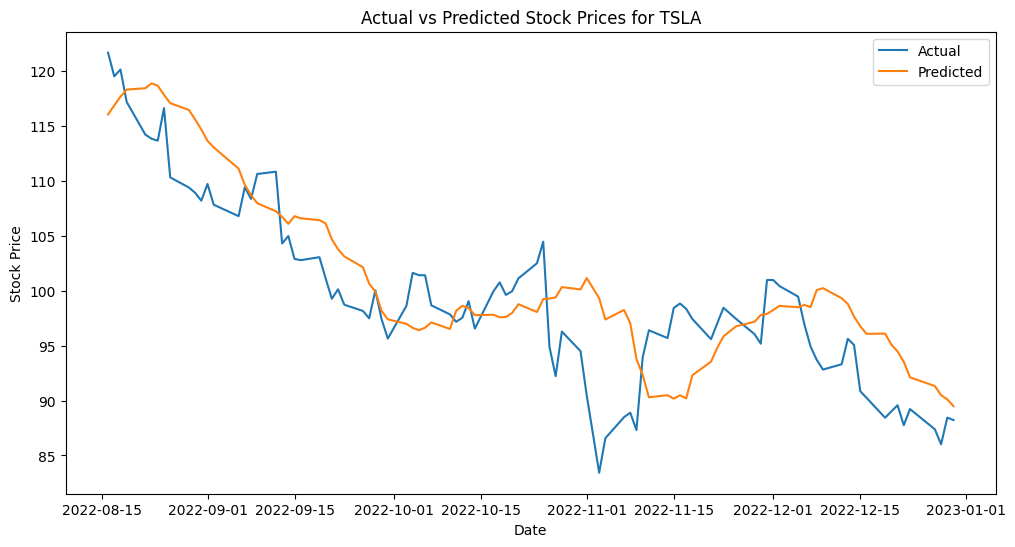

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))), axis=1))[:, 0]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

## CNN hypertuining parameters

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data and reshape for CNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 70 / 15 / 15 split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Model 1: Basic CNN
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))  # Added dropout
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper CNN
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Added another Conv1D layer
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Update the evaluate_model function to include additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic CNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (CNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper CNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0433 - val_loss: 0.0024
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 4.6716e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9499e-04 - val_loss: 4.4175e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8702e-04 - val_loss: 4.3809e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4148e-04 - val_loss: 4.3818e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5324e-04 - val_loss: 4.8956e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0673e-04 - val_loss: 4.3422e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3497e-04 - val_loss: 4.4397e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8375e-04 - val_loss: 5.1067e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7671e-04 - val_loss: 4.5216e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0328e-04 - val_loss: 4.4249e-0

## CNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Feature Selection
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = df[feature_columns].values
y = df['Close'].values


# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 2)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 17s]
val_loss: 16110.3251953125

Best val_loss So Far: 6.266447067260742
Total elapsed time: 00h 02m 13s
Best Hyperparameters:
Number of Layers: 2
Filters: 64
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 222.5417 - mean_absolute_error: 11.8219 - mean_squared_error: 222.5417 - val_loss: 24.0609 - val_mean_absolute_error: 4.4140 - val_mean_squared_error: 24.0609
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252.0527 - mean_absolute_error: 12.4888 - mean_squared_error: 252.0527 - val_loss: 42.4901 - val_mean_absolute_error: 6.1332 - val_mean_squared_error: 42.4901
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.0298 - mean_absolute_error: 11.8125 - mean_squared_error: 215.0298 - val_loss: 6.8873 - val_mean_absolute_error: 2.0958 - val_mean_squared_error: 6.8873
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 213.3535 - mean_absolute_error: 11.5627 - mean_squared_error: 213.3535 - val_loss: 22.0947 - val_mean_absolute_error: 4.2524 - val_mean_squared_error: 22.0947
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208.8923 - mean_absolute_error: 11.4292 - mean_squared_error: 208.8923 - val_loss: 10.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 319.3269 - mean_absolute_error: 13.8288 - mean_squared_error: 319.3269 - val_loss: 125.4304 - val_mean_absolute_error: 10.4965 - val_mean_squared_error: 125.4304
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 346.1013 - mean_absolute_error: 14.0340 - mean_squared_error: 346.1013 - val_loss: 27.6010 - val_mean_absolute_error: 4.3830 - val_mean_squared_error: 27.6010
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 336.9271 - mean_absolute_error: 13.9012 - mean_squared_error: 336.9271 - val_loss: 16.8363 - val_mean_absolute_error: 3.4620 - val_mean_squared_error: 16.8363
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.2851 - mean_absolute_error: 13.0907 - mean_squared_error: 293.2851 - val_loss: 24.5913 - val_mean_absolute_error: 4.1235 - val_mean_squared_error: 24.5913
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 280.4605 - mean_absolute_error: 12.5505 - mean_squared_error: 280.4605 - val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Reloading Tuner from project_dir/CNN1_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 2
Filters: 64
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 196.5420 - mean_absolute_error: 11.2223 - mean_squared_error: 196.5420 - val_loss: 44.6257 - val_mean_absolute_error: 6.2384 - val_mean_squared_error: 44.6257
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187.9419 - mean_absolute_error: 11.2539 - mean_squared_error: 187.9419 - val_loss: 20.6040 - val_mean_absolute_error: 4.0004 - val_mean_squared_error: 20.6040
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 187.4493 - mean_absolute_error: 10.8347 - mean_squared_error: 187.4493 - val_loss: 62.7658 - val_mean_absolute_error: 7.4743 - val_mean_squared_error: 62.7658
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 194.8378 - mean_absolute_error: 11.4299 - mean_squared_error: 194.8378 - val_loss: 112.9771 - val_mean_absolute_error: 10.1247 - val_mean_squared_error: 112.9771
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 189.8650 - mean_absolute_error: 10.8079 - mean_squared_error: 189.8650 - val_loss

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


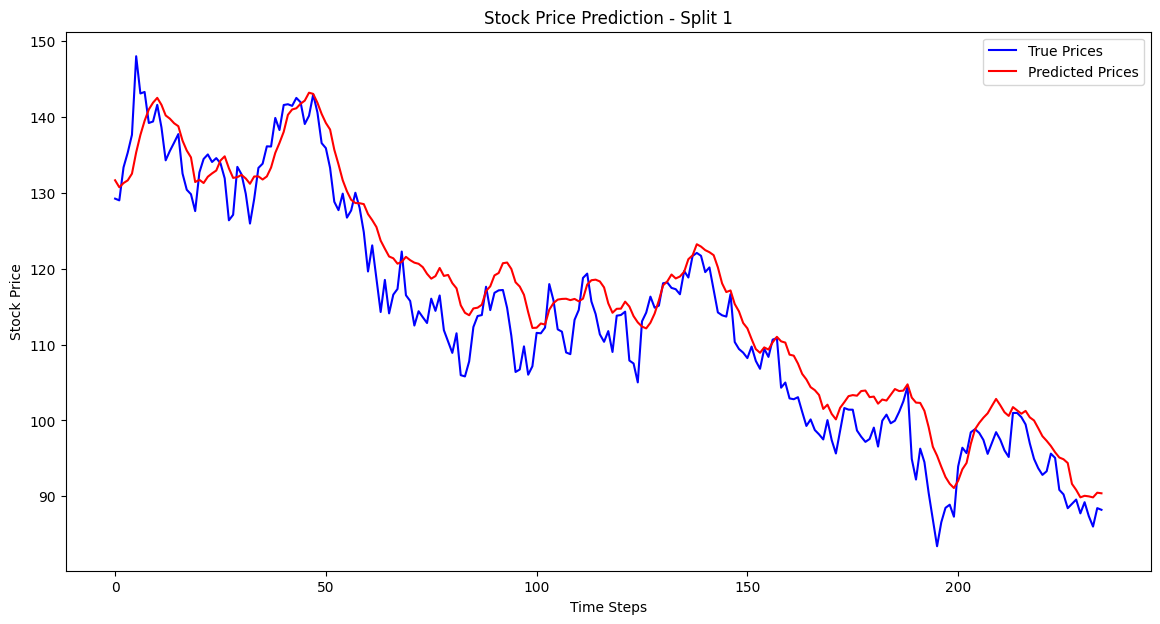

Split 1: MSE: 20.33915590121847, RMSE: 4.509895331514742, MAE: 3.7039183271692155, R²: 0.9147194461624807
Split 2: MSE: 10.266541045613641, RMSE: 3.204144354677804, MAE: 2.6282672274644208, R²: 0.8911566875797191
Split 3: MSE: 32.564078206997756, RMSE: 5.706494388589001, MAE: 4.483400655630678, R²: 0.9065949990687484


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 20.33915590121847, RMSE: 4.509895331514742, MAE: 3.7039183271692155, R²: 0.9147194461624807
Metrics for the 80/10/10 split: MSE: 10.266541045613641, RMSE: 3.204144354677804, MAE: 2.6282672274644208, R²: 0.8911566875797191
Metrics for the 60/20/20 split: MSE: 32.564078206997756, RMSE: 5.706494388589001, MAE: 4.483400655630678, R²: 0.9065949990687484


In [ ]:
CNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,997 (207.02 KB)

 Trainable params: 17,665 (69.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,332 (138.02 KB)

In [ ]:
# Save the best model
CNN_1_model_2.save('CNN1_best_model.h5')

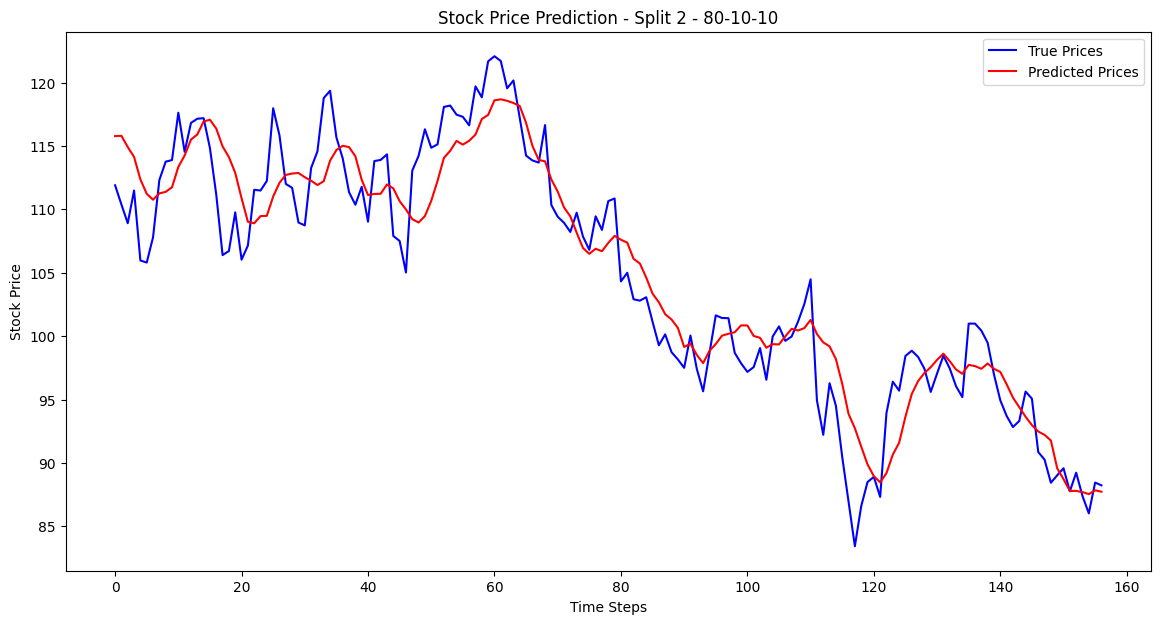

Split 1: MSE: 10.266541045613641, RMSE: 3.204144354677804, MAE: 2.6282672274644208, R²: 0.8911566875797191


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2 - 80-10-10')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


## CNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Increase input layer filters
    model.add(Conv1D(filters=hp.Int('filters', min_value=128, max_value=256, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Added Batch Normalization
    model.add(BatchNormalization())

    # Add more Conv1D layers
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout_2_' + str(i), 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Adjust regularization
    l2_reg = hp.Float('l2_regularization', 0.01, 0.1, step=0.01)
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-4, 1e-5, 1e-6, 1e-7])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    # Print model summary
    model.summary()

    return model

In [ ]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    global best_model, best_mse, best_params

    # Hyperparameter tuning setup
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN2_Stock_Prediction'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the best model and its hyperparameters
    current_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Model Training
    history = current_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation on the test set
    y_pred = current_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, current_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_2_model_1 = run_experiment(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_2_model_2 = run_experiment(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_2_model_3 = run_experiment(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 32s]
val_loss: 306.9171447753906

Best val_loss So Far: 57.284019470214844
Total elapsed time: 00h 06m 43s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 127,777 (499.13 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 110.6680 - mean_absolute_error: 8.0908 - mean_squared_error: 110.3791 - val_loss: 164.9402 - val_mean_absolute_error: 10.6264 - val_mean_squared_error: 164.6521
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96.5731 - mean_absolute_error: 7.4769 - mean_squared_error: 96.2858 - val_loss: 143.9000 - val_mean_absolute_error: 9.9802 - val_mean_squared_error: 143.6138
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 93.6382 - mean_absolute_error: 7.4716 - mean_squared_error: 93.3523 - val_loss: 86.7344 - val_mean_absolute_error: 7.6411 - val_mean_squared_error: 86.4499
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 92.1792 - mean_absolute_error: 7.4019 - mean_squared_error: 91.8946 - val_loss: 108.8962 - val_mean_absolute_error: 8.5998 - val_mean_squared_error: 108.6129
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.8442 - mean_absolute_error: 6.8773 - mean_squared_error: 75.5613 - val_loss: 141.578

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 127,777 (499.13 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 206.5891 - mean_absolute_error: 10.2488 - mean_squared_error: 206.2983 - val_loss: 1374.8951 - val_mean_absolute_error: 36.8476 - val_mean_squared_error: 1374.6025
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 159.6122 - mean_absolute_error: 9.1984 - mean_squared_error: 159.3199 - val_loss: 677.0883 - val_mean_absolute_error: 25.7181 - val_mean_squared_error: 676.7969
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.3833 - mean_absolute_error: 8.9644 - mean_squared_error: 139.0924 - val_loss: 329.4759 - val_mean_absolute_error: 17.7462 - val_mean_squared_error: 329.1862
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 139.2192 - mean_absolute_error: 8.7824 - mean_squared_error: 138.9297 - val_loss: 189.9826 - val_mean_absolute_error: 13.2814 - val_mean_squared_error: 189.6940
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.8405 - mean_absolute_error: 8.1975 - mean_squared_error: 121.5524 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 127,777 (499.13 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 81.5775 - mean_absolute_error: 7.1746 - mean_squared_error: 81.2891 - val_loss: 182.1146 - val_mean_absolute_error: 12.9189 - val_mean_squared_error: 181.8291
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 78.1017 - mean_absolute_error: 6.9430 - mean_squared_error: 77.8169 - val_loss: 97.9239 - val_mean_absolute_error: 8.8057 - val_mean_squared_error: 97.6401
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76.6451 - mean_absolute_error: 6.8883 - mean_squared_error: 76.3613 - val_loss: 51.1743 - val_mean_absolute_error: 6.3644 - val_mean_squared_error: 50.8909
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.7412 - mean_absolute_error: 6.3932 - mean_squared_error: 64.4581 - val_loss: 52.6651 - val_mean_absolute_error: 6.4376 - val_mean_squared_error: 52.3836
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.1723 - mean_absolute_error: 6.6126 - mean_squared_error: 68.8910 - val_loss: 55.1422 - val

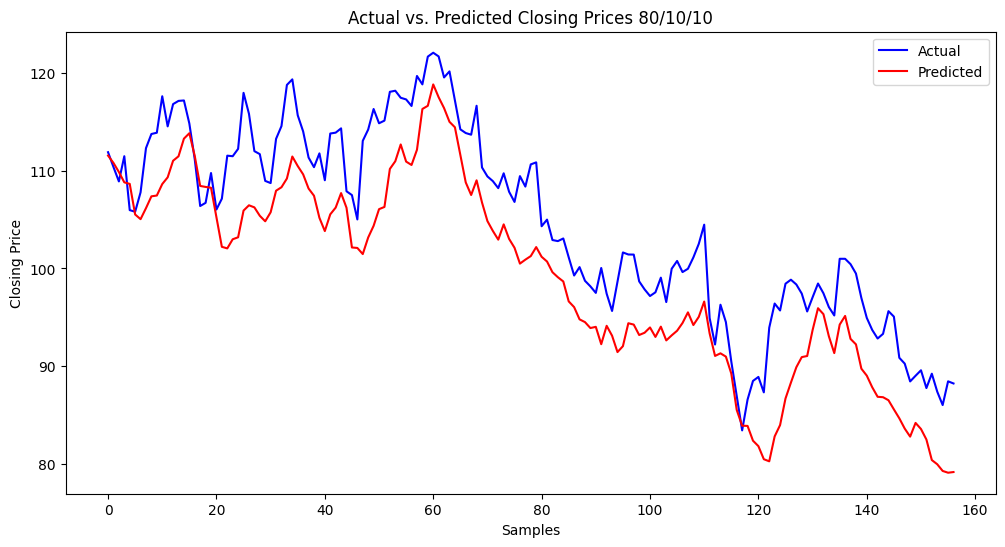

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## CNN Combine 3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Compute MACD
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()

    # Compute Bollinger Bands
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)

    # Calculate Volatility as Percentage Change
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

    # Extract Day, Month, Year
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare data
X = df[feature_columns].values
y = df['Close'].values


# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))  # Output layer for regression
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN3_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 23s]
val_loss: 49.10662841796875

Best val_loss So Far: 5.304417133331299
Total elapsed time: 00h 03m 27s
Best Hyperparameters:
Number of Layers: 2
Filters: 80
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 170.4842 - mean_absolute_error: 10.3548 - mean_squared_error: 170.4842 - val_loss: 224.6658 - val_mean_absolute_error: 14.6679 - val_mean_squared_error: 224.6658
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.3426 - mean_absolute_error: 9.8960 - mean_squared_error: 160.3426 - val_loss: 683.1742 - val_mean_absolute_error: 25.7286 - val_mean_squared_error: 683.1742
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.2491 - mean_absolute_error: 10.7593 - mean_squared_error: 183.2491 - val_loss: 191.6637 - val_mean_absolute_error: 13.4157 - val_mean_squared_error: 191.6637
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156.5983 - mean_absolute_error: 9.6863 - mean_squared_error: 156.5983 - val_loss: 179.6709 - val_mean_absolute_error: 12.9822 - val_mean_squared_error: 179.6709
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.5970 - mean_absolute_error: 9.1417 - mean_squared_error: 133.5970 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 269.8387 - mean_absolute_error: 11.9813 - mean_squared_error: 269.8387 - val_loss: 61.0468 - val_mean_absolute_error: 6.9606 - val_mean_squared_error: 61.0468
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 225.2034 - mean_absolute_error: 11.2217 - mean_squared_error: 225.2034 - val_loss: 541.5286 - val_mean_absolute_error: 23.0050 - val_mean_squared_error: 541.5286
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251.3693 - mean_absolute_error: 12.0308 - mean_squared_error: 251.3693 - val_loss: 342.1356 - val_mean_absolute_error: 18.1707 - val_mean_squared_error: 342.1356
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 285.2107 - mean_absolute_error: 12.6693 - mean_squared_error: 285.2107 - val_loss: 150.3656 - val_mean_absolute_error: 11.7006 - val_mean_squared_error: 150.3656
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 233.8437 - mean_absolute_error: 11.1412 - mean_squared_error: 233.8437 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 160.8841 - mean_absolute_error: 10.1857 - mean_squared_error: 160.8841 - val_loss: 234.6425 - val_mean_absolute_error: 14.6120 - val_mean_squared_error: 234.6425
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 144.9259 - mean_absolute_error: 9.4523 - mean_squared_error: 144.9259 - val_loss: 144.7107 - val_mean_absolute_error: 10.9544 - val_mean_squared_error: 144.7107
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 131.0162 - mean_absolute_error: 9.0051 - mean_squared_error: 131.0162 - val_loss: 45.5863 - val_mean_absolute_error: 5.4556 - val_mean_squared_error: 45.5863
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.7070 - mean_absolute_error: 9.3794 - mean_squared_error: 147.7070 - val_loss: 428.3751 - val_mean_absolute_error: 19.4244 - val_mean_squared_error: 428.3751
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.2315 - mean_absolute_error: 9.1803 - mean_squared_error: 131.2315 - val_lo

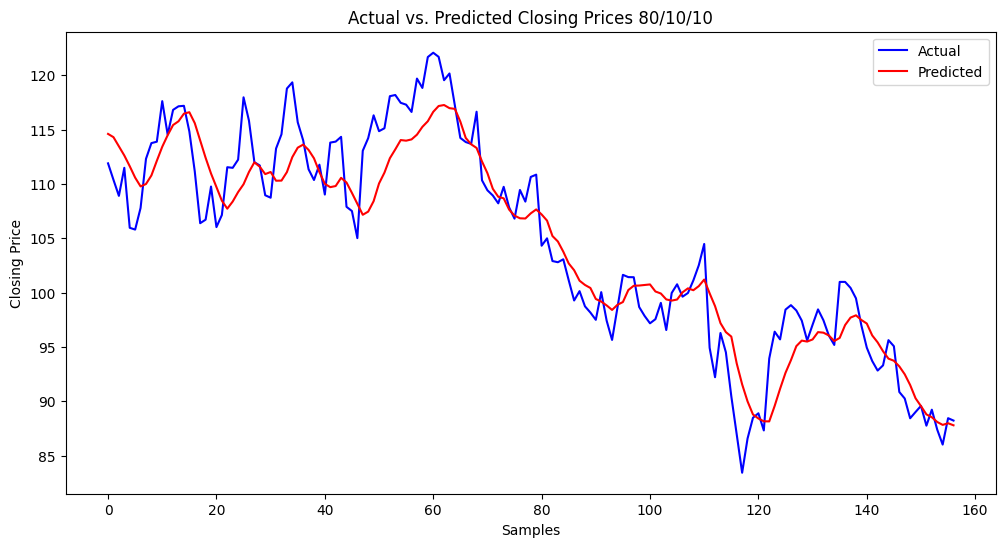

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# RNN

## RNN 10

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get GOOGL stock data for the past 10 years
data = yf.download('GOOGL', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0216 - mae: 0.1041 - mse: 0.0216
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.8986e-04 - mae: 0.0121 - mse: 2.8986e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.5910e-04 - mae: 0.0121 - mse: 2.5910e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.1999e-04 - mae: 0.0111 - mse: 2.1999e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.9292e-04 - mae: 0.0104 - mse: 1.9292e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.3933e-04 - mae: 0.0085 - mse: 1.3933e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.6300e-04 - mae: 0.0097 - mse: 1.6300e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.3564e-04 - mae: 0.0087 - mse: 1.3564e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.0271e-04 - mae: 0.0074 - mse: 1.0271e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.0038e-04 - mae: 0.0108 - mse

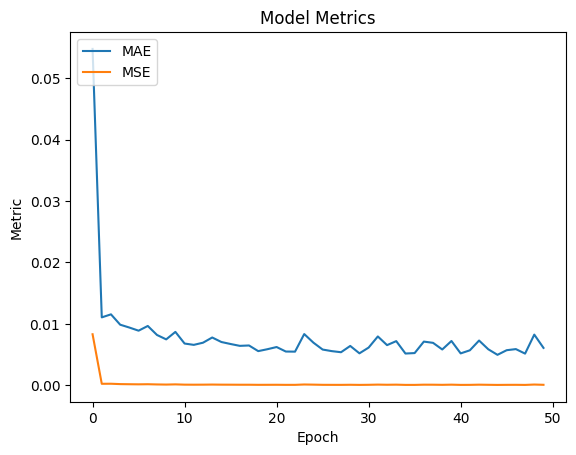

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN 5 Years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get GOOGL stock data for the past 5 years
data = yf.download('GOOGL', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1883 - mae: 0.2873 - mse: 0.1883
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - mae: 0.0370 - mse: 0.0022
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 7.6956e-04 - mae: 0.0216 - mse: 7.6956e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.8875e-04 - mae: 0.0206 - mse: 6.8875e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.2348e-04 - mae: 0.0174 - mse: 5.2348e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.5022e-04 - mae: 0.0161 - mse: 4.5022e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.7461e-04 - mae: 0.0167 - mse: 4.7461e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.9928e-04 - mae: 0.0152 - mse: 3.9928e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.8234e-04 - mae: 0.0148 - mse: 3.8234e-04
Epo

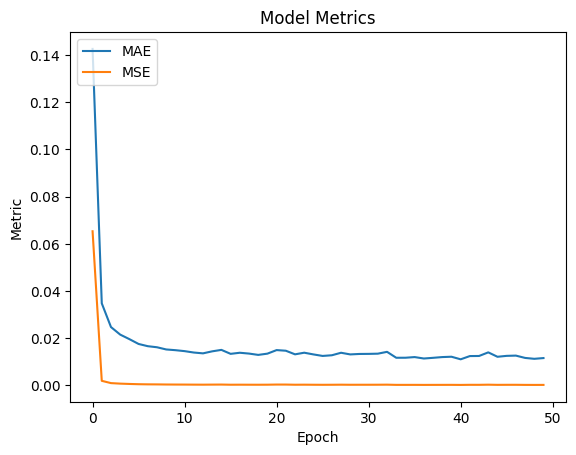

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN Feature Engineering

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for GOOGL for 7 years
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('GOOGL', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training, validation, and test sets (70/15/15 split)
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.15)
test_size = len(scaled_data) - train_size - val_size
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [ ]:
# Create sequences for predicting 'Close' price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
target_feature_index = features.index('Close')
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build RNN model to predict 'Close' value
RNN3 = Sequential()
RNN3.add(SimpleRNN(units=64, activation='relu', input_shape=(seq_length, len(features))))
RNN3.add(Dense(units=1))

# Compile the model
RNN3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = RNN3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0286 - mae: 0.1233 - mape: 6116.2603 - mse: 0.0286 - val_loss: 0.0177 - val_mae: 0.1233 - val_mape: 15.3850 - val_mse: 0.0177
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0284 - mape: 2212.9062 - mse: 0.0014 - val_loss: 0.0068 - val_mae: 0.0741 - val_mape: 9.2822 - val_mse: 0.0068
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8899e-04 - mae: 0.0209 - mape: 7147.5889 - mse: 7.8899e-04 - val_loss: 0.0030 - val_mae: 0.0420 - val_mape: 5.1884 - val_mse: 0.0030
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4293e-04 - mae: 0.0156 - mape: 6856.0059 - mse: 4.4293e-04 - val_loss: 0.0024 - val_mae: 0.0322 - val_mape: 3.8515 - val_mse: 0.0024
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7848e-04 - mae: 0.0125 - mape: 7266.0850 - mse: 2.7848e-04 - val_loss: 0.0013 - val_mae: 0.0247 - val_mape: 3.0497 - val_mse: 0.0013
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.

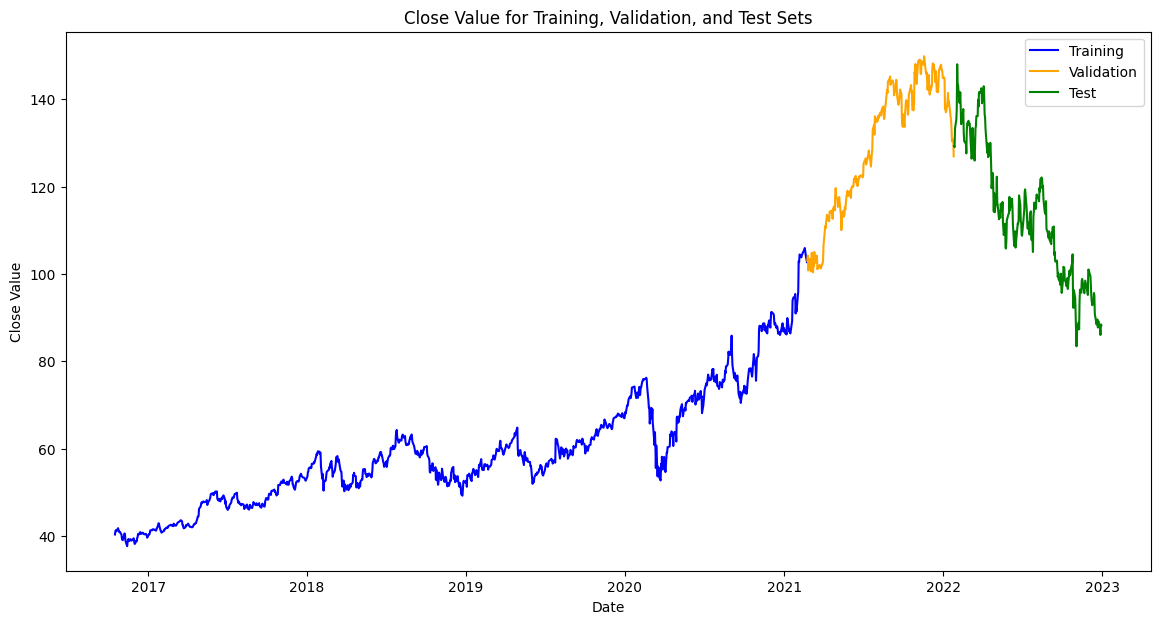

In [ ]:
import matplotlib.pyplot as plt

# Obtain the dates for each subset
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_size + val_size]
test_dates = df.index[train_size + val_size:]

# Obtain the close values for each subset
train_close = df['Close'][:train_size]
val_close = df['Close'][train_size:train_size + val_size]
test_close = df['Close'][train_size + val_size:]

# Plot the close value for each subset
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_close, label='Training', color='blue')
plt.plot(val_dates, val_close, label='Validation', color='orange')
plt.plot(test_dates, test_close, label='Test', color='green')

plt.title('Close Value for Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 10.04906153268082
MAE: 9.208376649370477
MSE: 100.98363768760541
R-squared: 0.5558720634645333


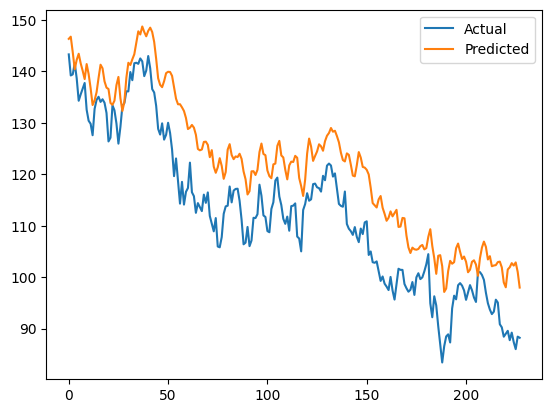

In [ ]:
# Make predictions for 'Close' value
predictions = RNN3.predict(X_test).flatten()
predictions = np.expand_dims(predictions, axis=1)
predictions = np.concatenate((predictions, np.zeros((len(predictions), len(features) - 1))), axis=1)
predictions = scaler.inverse_transform(predictions)[:, 0]

y_test = y_test.reshape(-1, 1)
y_test = np.concatenate((y_test, np.zeros((len(y_test), len(features) - 1))), axis=1)
y_test = scaler.inverse_transform(y_test)[:, 0]

# Evaluate the model for 'Close' value prediction
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics for 'Close' value prediction
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

## RNN hypertunining parameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Model 1: Basic RNN
model1 = Sequential()
model1.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: RNN with Dropout
model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper RNN
model3 = Sequential()
model3.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(SimpleRNN(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic RNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (RNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper RNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0590 - val_loss: 0.0011
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7613e-04 - val_loss: 2.5000e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8837e-04 - val_loss: 2.3276e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6480e-04 - val_loss: 2.3299e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5351e-04 - val_loss: 2.3004e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5689e-04 - val_loss: 2.5803e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7808e-04 - val_loss: 2.2512e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4513e-04 - val_loss: 2.4323e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4696e-04 - val_loss: 2.6502e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7313e-04 - val_loss: 2.2755e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4715e-04 - val_loss: 2.19

## RNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))



# Apply feature engineering
df = feature_engineering(df)

# Select only the specified feature columns
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    for _ in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10), activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 21s]
val_loss: 12.368361473083496

Best val_loss So Far: 6.224518299102783
Total elapsed time: 00h 03m 18s
Best Hyperparameters:
Number of Layers: 1
units: 100
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 33.5242 - mean_absolute_error: 4.4905 - mean_squared_error: 33.5242 - val_loss: 10.1400 - val_mean_absolute_error: 2.4462 - val_mean_squared_error: 10.1400
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.5585 - mean_absolute_error: 4.5277 - mean_squared_error: 33.5585 - val_loss: 6.7408 - val_mean_absolute_error: 1.9945 - val_mean_squared_error: 6.7408
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.1436 - mean_absolute_error: 4.9382 - mean_squared_error: 41.1436 - val_loss: 17.2244 - val_mean_absolute_error: 3.7122 - val_mean_squared_error: 17.2244
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.3154 - mean_absolute_error: 4.7775 - mean_squared_error: 37.3154 - val_loss: 7.7965 - val_mean_absolute_error: 2.2738 - val_mean_squared_error: 7.7965
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.4493 - mean_absolute_error: 4.8392 - mean_squared_error: 39.4493 - val_loss: 6.4407 - val_mean_ab

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 49.5435 - mean_absolute_error: 5.2689 - mean_squared_error: 49.5435 - val_loss: 16.7450 - val_mean_absolute_error: 3.4659 - val_mean_squared_error: 16.7450
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.3831 - mean_absolute_error: 5.3543 - mean_squared_error: 53.3831 - val_loss: 17.1455 - val_mean_absolute_error: 3.2910 - val_mean_squared_error: 17.1455
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.7889 - mean_absolute_error: 5.3168 - mean_squared_error: 50.7889 - val_loss: 19.7856 - val_mean_absolute_error: 3.5038 - val_mean_squared_error: 19.7856
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.5203 - mean_absolute_error: 5.1668 - mean_squared_error: 48.5203 - val_loss: 21.4144 - val_mean_absolute_error: 3.8797 - val_mean_squared_error: 21.4144
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.2466 - mean_absolute_error: 5.2859 - mean_squared_error: 49.2466 - val_loss: 26.1428 - val_me

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 27.6289 - mean_absolute_error: 4.1663 - mean_squared_error: 27.6289 - val_loss: 11.1529 - val_mean_absolute_error: 2.8593 - val_mean_squared_error: 11.1529
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.4257 - mean_absolute_error: 4.0678 - mean_squared_error: 26.4257 - val_loss: 3.6776 - val_mean_absolute_error: 1.4511 - val_mean_squared_error: 3.6776
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.9618 - mean_absolute_error: 4.2598 - mean_squared_error: 29.9618 - val_loss: 5.4703 - val_mean_absolute_error: 1.7993 - val_mean_squared_error: 5.4703
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.0273 - mean_absolute_error: 4.4003 - mean_squared_error: 31.0273 - val_loss: 7.1542 - val_mean_absolute_error: 2.1460 - val_mean_squared_error: 7.1542
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.4421 - mean_absolute_error: 4.2736 - mean_squared_error: 28.4421 - val_loss: 5.2833 - val_mean_abso

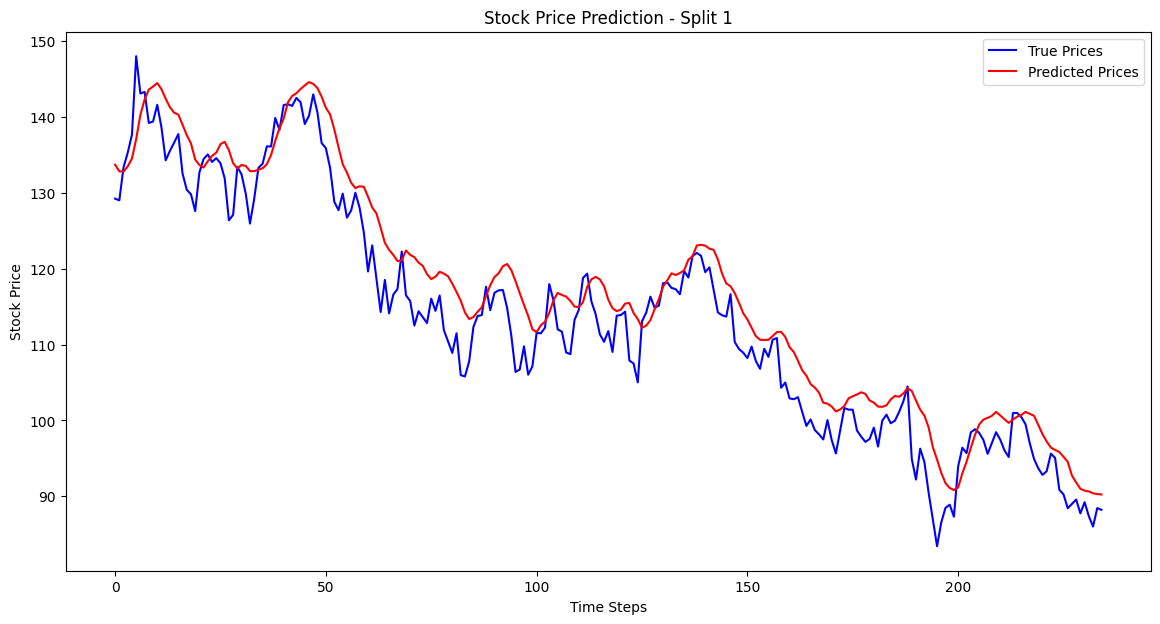

Split 1: MSE: 23.584184149376544, RMSE: 4.856355027114116, MAE: 4.003689997246925, R²: 0.9011132863215633
Split 2: MSE: 15.943849820940263, RMSE: 3.992975058892838, MAE: 3.1917432068259854, R²: 0.8309672732488534
Split 3: MSE: 17.45928480056674, RMSE: 4.178430901734135, MAE: 3.3789219962903103, R²: 0.9499207530859731


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 23.584184149376544, RMSE: 4.856355027114116, MAE: 4.003689997246925, R²: 0.9011132863215633
Metrics for the 80/10/10 split: MSE: 15.943849820940263, RMSE: 3.992975058892838, MAE: 3.1917432068259854, R²: 0.8309672732488534
Metrics for the 60/20/20 split: MSE: 17.45928480056674, RMSE: 4.178430901734135, MAE: 3.3789219962903103, R²: 0.9499207530859731


In [ ]:
RNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 100)              │          10,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,005 (128.93 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,004 (85.96 KB)

In [ ]:
# Save the best model
RNN_1_model_2.save('RNN1_best_model.h5')

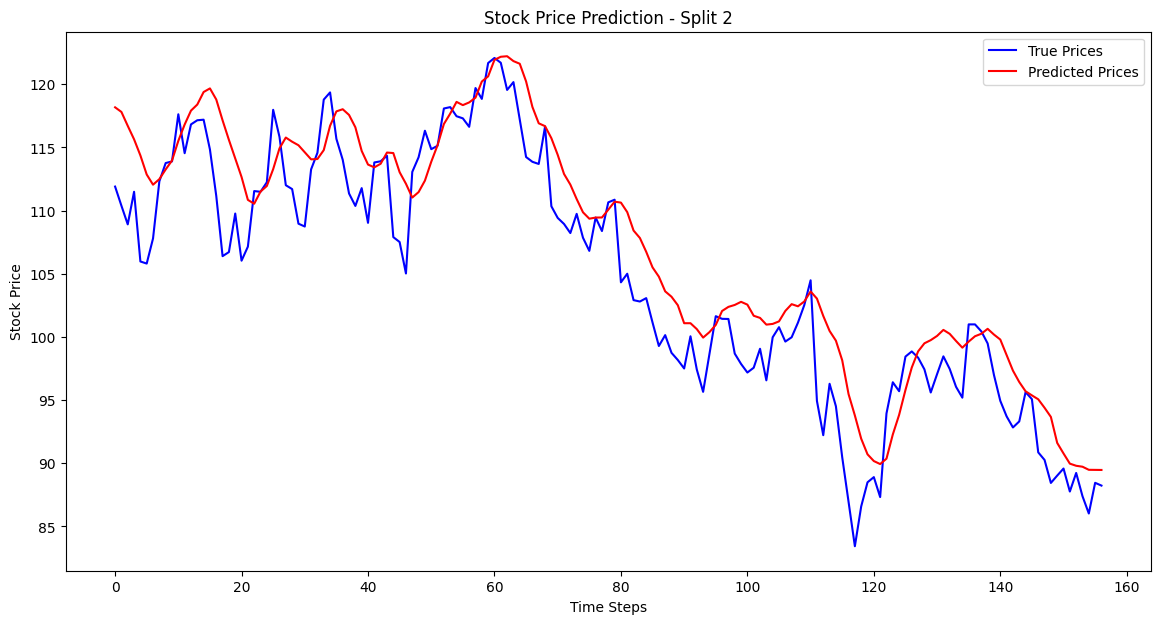

Split 2: MSE: 15.943849820940263, RMSE: 3.992975058892838, MAE: 3.1917432068259854, R²: 0.8309672732488534


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

## RNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Add SimpleRNN layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10),
                           activation=activation,
                           return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN2_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_2_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_2_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_2_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 24s]
val_loss: 13408.2412109375

Best val_loss So Far: 6.808500289916992
Total elapsed time: 00h 03m 34s
Best Hyperparameters:
Number of Layers: 2
units: 80
Dropout Rate: 0.4
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 101.0647 - mean_absolute_error: 7.9041 - mean_squared_error: 101.0647 - val_loss: 18.2171 - val_mean_absolute_error: 3.6038 - val_mean_squared_error: 18.2171
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.2424 - mean_absolute_error: 8.6721 - mean_squared_error: 118.2424 - val_loss: 8.4807 - val_mean_absolute_error: 2.3580 - val_mean_squared_error: 8.4807
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.6882 - mean_absolute_error: 7.9959 - mean_squared_error: 101.6882 - val_loss: 6.2914 - val_mean_absolute_error: 2.0257 - val_mean_squared_error: 6.2914
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.6686 - mean_absolute_error: 8.1964 - mean_squared_error: 110.6686 - val_loss: 15.3303 - val_mean_absolute_error: 3.4105 - val_mean_squared_error: 15.3303
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.7767 - mean_absolute_error: 8.3209 - mean_squared_error: 111.7767 - val_loss: 12.7973 - 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 141.2500 - mean_absolute_error: 9.0795 - mean_squared_error: 141.2500 - val_loss: 12.5226 - val_mean_absolute_error: 2.9586 - val_mean_squared_error: 12.5226
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.1366 - mean_absolute_error: 9.3535 - mean_squared_error: 151.1366 - val_loss: 12.7292 - val_mean_absolute_error: 2.9941 - val_mean_squared_error: 12.7292
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145.2097 - mean_absolute_error: 9.2283 - mean_squared_error: 145.2097 - val_loss: 13.7771 - val_mean_absolute_error: 3.0257 - val_mean_squared_error: 13.7771
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156.1777 - mean_absolute_error: 9.3714 - mean_squared_error: 156.1777 - val_loss: 13.3597 - val_mean_absolute_error: 3.0800 - val_mean_squared_error: 13.3597
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.7772 - mean_absolute_error: 9.2757 - mean_squared_error: 147.7772 - val_loss: 15.591

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 101.7292 - mean_absolute_error: 7.9989 - mean_squared_error: 101.7292 - val_loss: 18.9547 - val_mean_absolute_error: 3.7778 - val_mean_squared_error: 18.9547
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104.7704 - mean_absolute_error: 8.0309 - mean_squared_error: 104.7704 - val_loss: 14.0869 - val_mean_absolute_error: 3.1654 - val_mean_squared_error: 14.0869
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.2321 - mean_absolute_error: 8.2661 - mean_squared_error: 101.2321 - val_loss: 7.2409 - val_mean_absolute_error: 2.1847 - val_mean_squared_error: 7.2409
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.6125 - mean_absolute_error: 7.7131 - mean_squared_error: 95.6125 - val_loss: 15.8235 - val_mean_absolute_error: 3.4583 - val_mean_squared_error: 15.8235
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97.1039 - mean_absolute_error: 7.8595 - mean_squared_error: 97.1039 - val_loss: 17.5400 - va

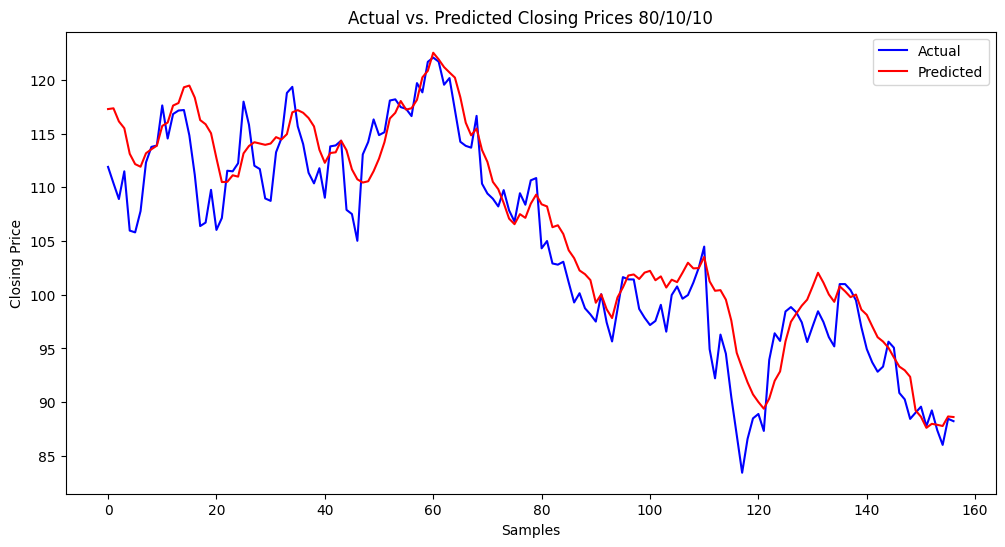

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## RNN Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add SimpleRNN layer
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu', return_sequences=True))

    # Adding additional SimpleRNN layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                             activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Final RNN layer without return_sequences
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu'))

    # Output layer for regression
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 22s]
val_loss: 3625.969482421875

Best val_loss So Far: 7.444934844970703
Total elapsed time: 00h 08m 00s
Best Hyperparameters:
Number of Layers: 1
units: 128
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 175.3747 - mean_absolute_error: 10.3114 - mean_squared_error: 175.3747 - val_loss: 157.2321 - val_mean_absolute_error: 12.3049 - val_mean_squared_error: 157.2321
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 18.1022 - mean_absolute_error: 3.3841 - mean_squared_error: 18.1022 - val_loss: 5.8680 - val_mean_absolute_error: 1.9991 - val_mean_squared_error: 5.8680
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 10.9220 - mean_absolute_error: 2.5675 - mean_squared_error: 10.9220 - val_loss: 30.3951 - val_mean_absolute_error: 5.0468 - val_mean_squared_error: 30.3951
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 10.4062 - mean_absolute_error: 2.4581 - mean_squared_error: 10.4062 - val_loss: 5.6990 - val_mean_absolute_error: 1.9702 - val_mean_squared_error: 5.6990
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 10.9563 - mean_absolute_error: 2.6426 - mean_squared_error: 10.9563 - val_loss: 6.7520 - v

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 255.2652 - mean_absolute_error: 11.3035 - mean_squared_error: 255.2652 - val_loss: 112.1211 - val_mean_absolute_error: 9.9553 - val_mean_squared_error: 112.1211
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 17.5892 - mean_absolute_error: 3.3100 - mean_squared_error: 17.5892 - val_loss: 14.5200 - val_mean_absolute_error: 2.9630 - val_mean_squared_error: 14.5200
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 12.6936 - mean_absolute_error: 2.7664 - mean_squared_error: 12.6936 - val_loss: 14.1273 - val_mean_absolute_error: 2.9317 - val_mean_squared_error: 14.1273
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 12.2714 - mean_absolute_error: 2.6829 - mean_squared_error: 12.2714 - val_loss: 23.2244 - val_mean_absolute_error: 3.8615 - val_mean_squared_error: 23.2244
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 10.0663 - mean_absolute_error: 2.3587 - mean_squared_error: 10.0663 - val_loss: 15.4016

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 153.7305 - mean_absolute_error: 9.7549 - mean_squared_error: 153.7305 - val_loss: 14.7794 - val_mean_absolute_error: 3.1231 - val_mean_squared_error: 14.7794
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 16.7535 - mean_absolute_error: 3.2519 - mean_squared_error: 16.7535 - val_loss: 34.5621 - val_mean_absolute_error: 4.9450 - val_mean_squared_error: 34.5621
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.7955 - mean_absolute_error: 2.3445 - mean_squared_error: 8.7955 - val_loss: 106.0462 - val_mean_absolute_error: 9.1609 - val_mean_squared_error: 106.0462
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 11.3600 - mean_absolute_error: 2.6966 - mean_squared_error: 11.3600 - val_loss: 75.0069 - val_mean_absolute_error: 7.3180 - val_mean_squared_error: 75.0069
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 10.8290 - mean_absolute_error: 2.5562 - mean_squared_error: 10.8290 - val_loss: 151.9997 -

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 19.084493931005905, RMSE: 4.368580310696589, MAE: 3.605096435546875, R²: 0.9199801496163634
Metrics for the 80/10/10 split: MSE: 184.69831633432412, RMSE: 13.590375871708778, MAE: 13.240070027150926, R²: -0.9581255711109982
Metrics for the 60/20/20 split: MSE: 82.60464259285533, RMSE: 9.088709621990095, MAE: 7.040115673321123, R²: 0.7630614117413183


In [ ]:
RNN_3_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,685 (967.52 KB)

 Trainable params: 82,561 (322.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,124 (645.02 KB)

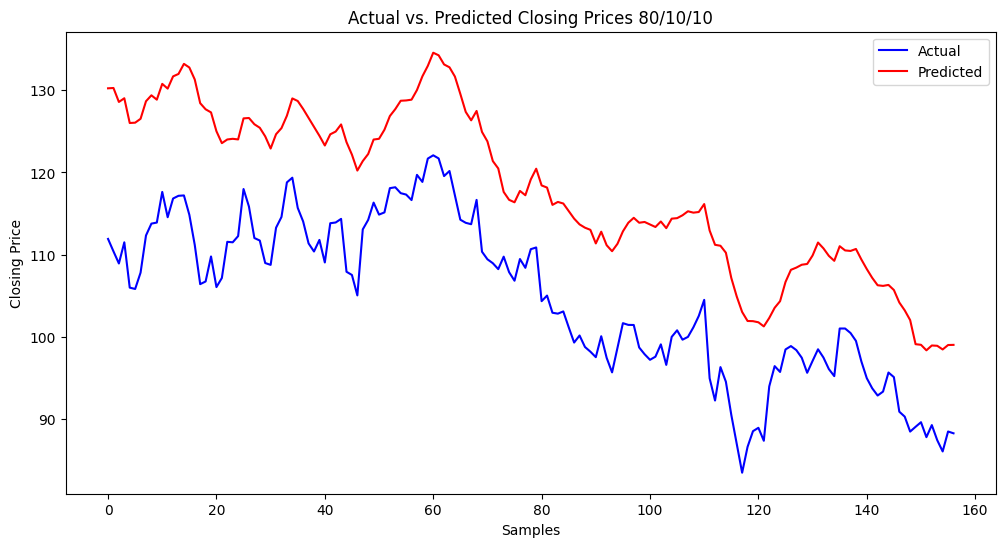

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM

## LSTM 10 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get GOOGL stock data for the past 10 years
data = yf.download('GOOGL', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0155 - mae: 0.0827 - mse: 0.0155
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 1.8844e-04 - mae: 0.0094 - mse: 1.8844e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.9579e-04 - mae: 0.0124 - mse: 2.9579e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 1.8506e-04 - mae: 0.0093 - mse: 1.8506e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.1283e-04 - mae: 0.0103 - mse: 2.1283e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.5918e-04 - mae: 0.0087 - mse: 1.5918e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 1.5728e-04 - mae: 0.0085 - mse: 1.5728e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.5720e-04 - mae: 0.0088 - mse: 1.5720e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.5444e-04 - mae: 0.0084 - mse: 1.5444e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2362e-04 - mae: 0.0106 - mse: 2.2362e-0

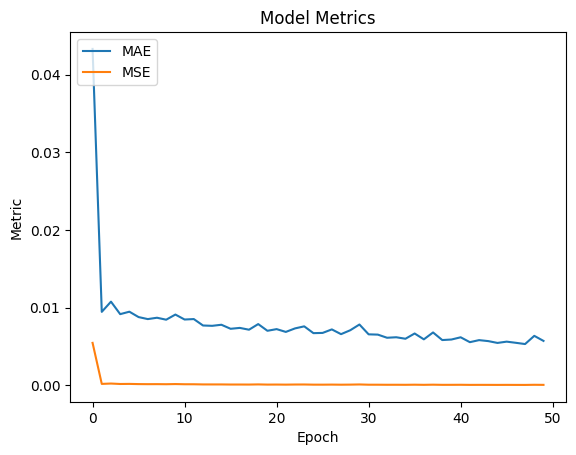

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## lstm 5 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get GOOGL stock data for the past 5 years
data = yf.download('GOOGL', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0659 - mae: 0.1625 - mse: 0.0659
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0014 - mae: 0.0280 - mse: 0.0014
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 8.6590e-04 - mae: 0.0221 - mse: 8.6590e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 9.5045e-04 - mae: 0.0227 - mse: 9.5045e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.2096e-04 - mae: 0.0217 - mse: 8.2096e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.2233e-04 - mae: 0.0214 - mse: 8.2233e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 8.1522e-04 - mae: 0.0212 - mse: 8.1522e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 7.8917e-04 - mae: 0.0211 - mse: 7.8917e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.2151e-04 - mae: 0.0210 - mse: 8.2151e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 7.5392e-04 - mae: 0.0203 - mse: 7.5392e-04
Epoch 

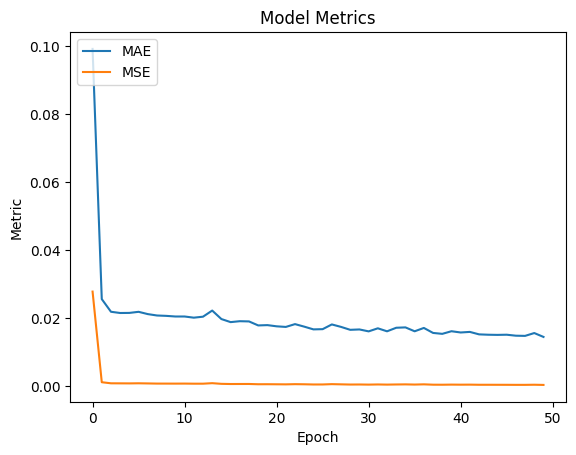

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## LSTM feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for GOOGL (7 years)
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('GOOGL', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop NaN values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define features and target
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
target = 'Close'

# Extract features and target
data = df[features].values
target_data = df[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target_data)

# Split the data into training, validation, and test sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create sequences for LSTM
seq_length = 7
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train, y_train, seq_length)
X_val, y_val = create_sequences(X_val, y_val, seq_length)
X_test, y_test = create_sequences(X_test, y_test, seq_length)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0114 - mae: 0.0716 - mse: 0.0114 - val_loss: 0.0011 - val_mae: 0.0243 - val_mse: 0.0011
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8330e-04 - mae: 0.0162 - mse: 4.8330e-04 - val_loss: 7.7522e-04 - val_mae: 0.0219 - val_mse: 7.7522e-04
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7499e-04 - mae: 0.0140 - mse: 3.7499e-04 - val_loss: 8.5941e-04 - val_mae: 0.0228 - val_mse: 8.5941e-04
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9798e-04 - mae: 0.0127 - mse: 2.9798e-04 - val_loss: 0.0016 - val_mae: 0.0330 - val_mse: 0.0016
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2344e-04 - mae: 0.0128 - mse: 3.2344e-04 - val_loss: 8.7209e-04 - val_mae: 0.0232 - val_mse: 8.7209e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7974e-04 - mae: 0.0119 - mse: 2.7974e-04 - val_loss: 7.0829e-04 - val_mae: 0.0204 - val_mse: 7.0829e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms

RMSE: 8.146481433639808
MSE: 66.36515974863809
MAE: 7.470507805807552
R-squared: 0.7081247800936872


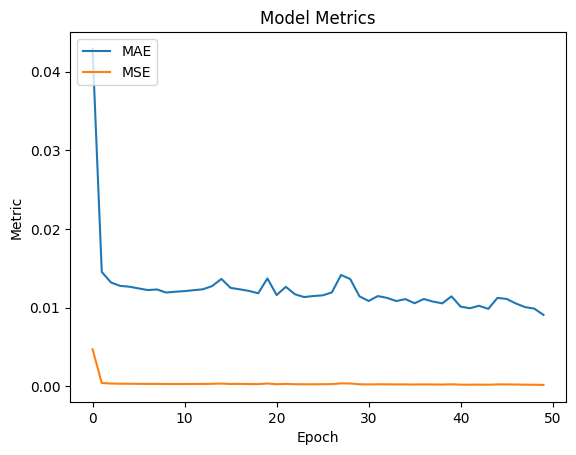

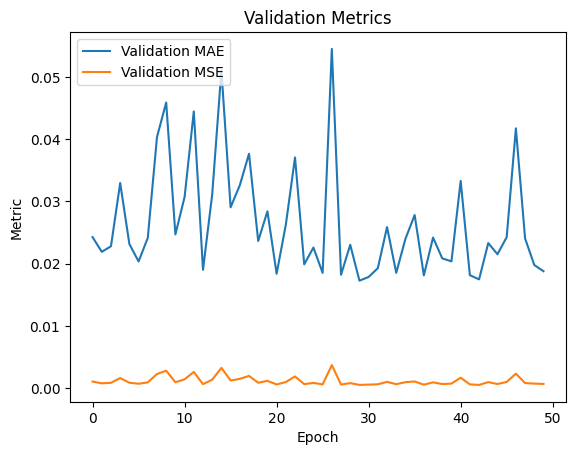

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Plot validation metrics
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('Validation Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Validation MAE', 'Validation MSE'], loc='upper left')
plt.show()

## lstm  hyperparameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Models
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(LSTM(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1112 - val_loss: 0.0081
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 8.8420e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7973e-04 - val_loss: 4.3638e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6944e-04 - val_loss: 3.7609e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2926e-04 - val_loss: 3.3909e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4731e-04 - val_loss: 3.6782e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0036e-04 - val_loss: 3.3354e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4563e-04 - val_loss: 3.9202e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3261e-04 - val_loss: 3.3757e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0866e-04 - val_loss: 5.0387e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4350e-04 - val_loss: 3.0704e-

In [ ]:
# Evaluate models on the test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic LSTM) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (LSTM with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper LSTM) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Model 1 (Basic LSTM) - RMSE: 1.969704909439117 MAE: 1.3710012724905303 MSE: 3.87973743026856 R^2: 0.9961691062239788
Model 2 (LSTM with Dropout) - RMSE: 9.98614593391554 MAE: 9.17898416519165 MSE: 99.72311061345786 R^2: 0.9015323457731728
Model 3 (Deeper LSTM) - RMSE: 9.367996165983607 MAE: 7.956016352682402 MSE: 87.75935216588357 R^2: 0.9133454874092707


## LSTM Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 48s]
val_loss: 2619.868408203125

Best val_loss So Far: 8.103710174560547
Total elapsed time: 00h 05m 03s
Best Hyperparameters:
Number of Layers: 1
units: 60
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 147.2514 - mean_absolute_error: 9.6047 - mean_squared_error: 147.2514 - val_loss: 30.5390 - val_mean_absolute_error: 4.9775 - val_mean_squared_error: 30.5390
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 150.5136 - mean_absolute_error: 9.5554 - mean_squared_error: 150.5136 - val_loss: 40.0665 - val_mean_absolute_error: 5.8332 - val_mean_squared_error: 40.0665
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 133.5136 - mean_absolute_error: 9.3000 - mean_squared_error: 133.5136 - val_loss: 73.1794 - val_mean_absolute_error: 8.1953 - val_mean_squared_error: 73.1794
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.0816 - mean_absolute_error: 8.8567 - mean_squared_error: 124.0816 - val_loss: 68.3195 - val_mean_absolute_error: 7.8954 - val_mean_squared_error: 68.3195
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 128.0121 - mean_absolute_error: 8.8897 - mean_squared_error: 128.0121 - val_loss: 51.36

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 178.4862 - mean_absolute_error: 10.4344 - mean_squared_error: 178.4862 - val_loss: 14.3195 - val_mean_absolute_error: 3.0718 - val_mean_squared_error: 14.3195
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 182.9350 - mean_absolute_error: 10.3245 - mean_squared_error: 182.9350 - val_loss: 59.4251 - val_mean_absolute_error: 6.7498 - val_mean_squared_error: 59.4251
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176.6855 - mean_absolute_error: 10.0445 - mean_squared_error: 176.6855 - val_loss: 73.0138 - val_mean_absolute_error: 7.6225 - val_mean_squared_error: 73.0138
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 188.7836 - mean_absolute_error: 10.3844 - mean_squared_error: 188.7836 - val_loss: 49.3371 - val_mean_absolute_error: 6.0414 - val_mean_squared_error: 49.3371
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.2545 - mean_absolute_error: 9.7277 - mean_squared_error: 170.2545 - val_loss: 19

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 131.4499 - mean_absolute_error: 9.2399 - mean_squared_error: 131.4499 - val_loss: 34.8394 - val_mean_absolute_error: 5.1489 - val_mean_squared_error: 34.8394
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.2384 - mean_absolute_error: 9.0554 - mean_squared_error: 125.2384 - val_loss: 16.1964 - val_mean_absolute_error: 3.3984 - val_mean_squared_error: 16.1964
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.7851 - mean_absolute_error: 8.9687 - mean_squared_error: 128.7851 - val_loss: 22.3766 - val_mean_absolute_error: 3.9569 - val_mean_squared_error: 22.3766
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.9316 - mean_absolute_error: 8.3950 - mean_squared_error: 111.9316 - val_loss: 80.2802 - val_mean_absolute_error: 7.9727 - val_mean_squared_error: 80.2802
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.4738 - mean_absolute_error: 8.1327 - mean_squared_error: 107.4738 - val_loss: 113.15

Metrics for the 70/15/15 split: MSE: 21.514829142922487, RMSE: 4.638408039718206, MAE: 3.578095878438747, R²: 0.9097899365175665
Metrics for the 80/10/10 split: MSE: 15.70467328865735, RMSE: 3.9629122231835203, MAE: 3.1634378129509604, R²: 0.8335029633036837
Metrics for the 60/20/20 split: MSE: 87.54323791801228, RMSE: 9.356454345424462, MAE: 7.552451819276658, R²: 0.7488958180459243


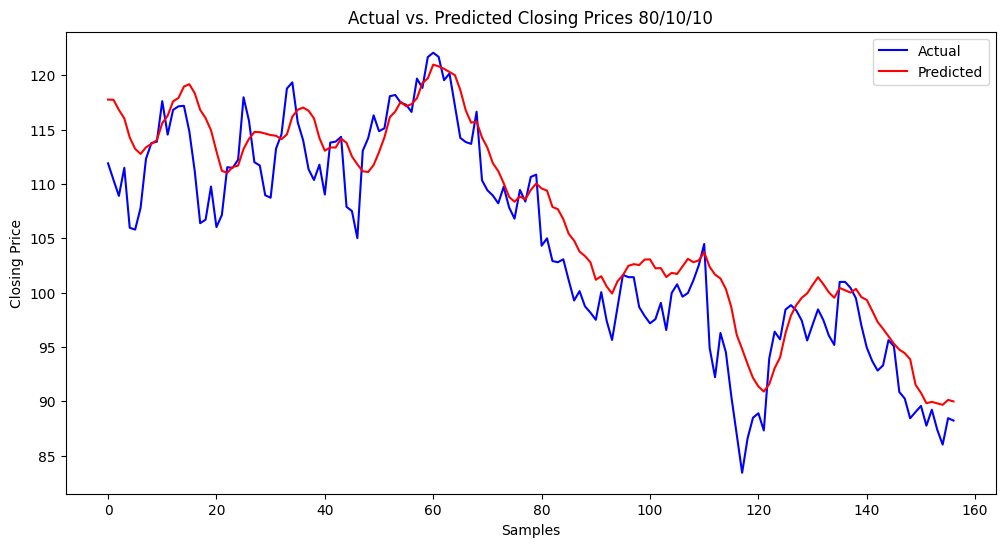

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM2_Stock_Prediction'
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 50s]
val_loss: 6172.00341796875

Best val_loss So Far: 32.95505905151367
Total elapsed time: 00h 05m 04s
Best Hyperparameters:
Number of Layers: 3
Units: 60
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 241.8950 - mean_absolute_error: 12.1025 - mean_squared_error: 241.8950 - val_loss: 498.1937 - val_mean_absolute_error: 21.2132 - val_mean_squared_error: 498.1937
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 142.1167 - mean_absolute_error: 9.5113 - mean_squared_error: 142.1167 - val_loss: 834.5811 - val_mean_absolute_error: 27.9964 - val_mean_squared_error: 834.5811
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 143.6316 - mean_absolute_error: 9.5013 - mean_squared_error: 143.6316 - val_loss: 857.0979 - val_mean_absolute_error: 28.4019 - val_mean_squared_error: 857.0979
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.2265 - mean_absolute_error: 8.9742 - mean_squared_error: 130.2265 - val_loss: 484.8306 - val_mean_absolute_error: 21.2486 - val_mean_squared_error: 484.8306
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.4739 - mean_absolute_error: 8.7087 - mean_squared_error: 126.4739 - val

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 261.3110 - mean_absolute_error: 12.5713 - mean_squared_error: 261.3110 - val_loss: 71.2052 - val_mean_absolute_error: 7.4151 - val_mean_squared_error: 71.2052
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 210.9047 - mean_absolute_error: 10.9208 - mean_squared_error: 210.9047 - val_loss: 117.7495 - val_mean_absolute_error: 9.6731 - val_mean_squared_error: 117.7495
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 224.3573 - mean_absolute_error: 11.0611 - mean_squared_error: 224.3573 - val_loss: 41.0825 - val_mean_absolute_error: 5.5158 - val_mean_squared_error: 41.0825
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 190.8585 - mean_absolute_error: 10.4375 - mean_squared_error: 190.8585 - val_loss: 427.2463 - val_mean_absolute_error: 20.1465 - val_mean_squared_error: 427.2463
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 221.8788 - mean_absolute_error: 11.1513 - mean_squared_error: 221.8788 - val_lo

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 178.2352 - mean_absolute_error: 10.9756 - mean_squared_error: 178.2352 - val_loss: 208.4680 - val_mean_absolute_error: 12.7006 - val_mean_squared_error: 208.4680
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125.1084 - mean_absolute_error: 8.9148 - mean_squared_error: 125.1084 - val_loss: 290.4901 - val_mean_absolute_error: 13.9642 - val_mean_squared_error: 290.4901
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109.0303 - mean_absolute_error: 8.3717 - mean_squared_error: 109.0303 - val_loss: 143.8083 - val_mean_absolute_error: 8.8288 - val_mean_squared_error: 143.8083
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 110.3547 - mean_absolute_error: 8.3485 - mean_squared_error: 110.3547 - val_loss: 293.5478 - val_mean_absolute_error: 14.0024 - val_mean_squared_error: 293.5478
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97.5421 - mean_absolute_error: 7.9698 - mean_squared_error: 97.5421 - val_lo

Metrics for the 70/15/15 split: MSE: 118.48969469011286, RMSE: 10.88529717968751, MAE: 9.308518754675033, R²: 0.5031816051615965
Metrics for the 80/10/10 split: MSE: 11.25792110501529, RMSE: 3.355282567089587, MAE: 2.7448352886613008, R²: 0.880646322983379
Metrics for the 60/20/20 split: MSE: 259.76891594180876, RMSE: 16.117348291260843, MAE: 13.557964312763641, R²: 0.2548932083623119


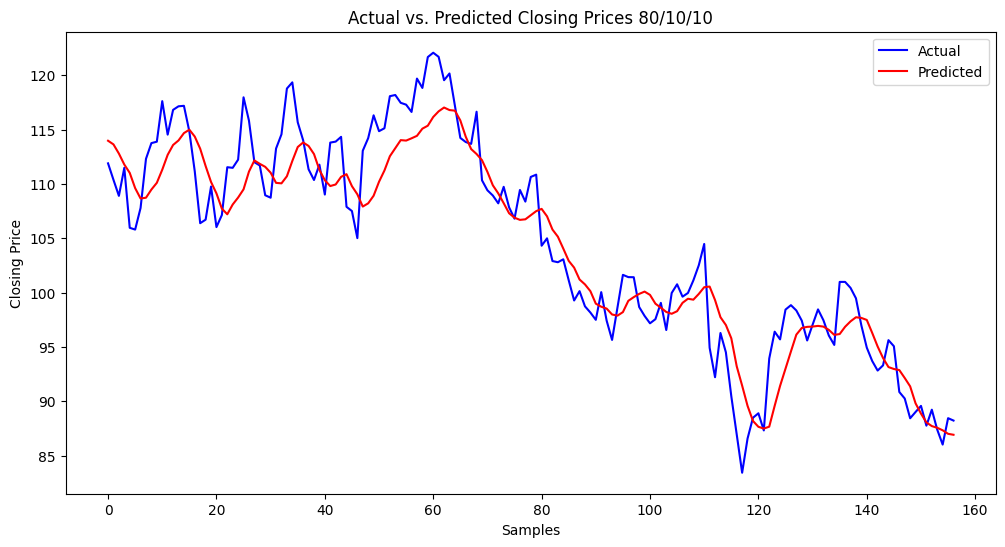

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for GOOGL
df = yf.download('GOOGL', start='2016-01-01', end='2023-01-01')

# Function for feature engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

# RSI computation function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


# Apply feature engineering
df = feature_engineering(df)

# Select features and target
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]
X = df[feature_columns].values
y = df['Close'].values

# Use MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 04s]
val_loss: 15762.7314453125

Best val_loss So Far: 9.533063888549805
Total elapsed time: 00h 05m 12s
Best Hyperparameters:
Number of Layers: 2
units: 110
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 57.6052 - mean_absolute_error: 5.9145 - mean_squared_error: 57.6052 - val_loss: 16.8138 - val_mean_absolute_error: 3.2594 - val_mean_squared_error: 16.8138
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 45.0435 - mean_absolute_error: 5.2479 - mean_squared_error: 45.0435 - val_loss: 34.9221 - val_mean_absolute_error: 5.3841 - val_mean_squared_error: 34.9221
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.5909 - mean_absolute_error: 5.2744 - mean_squared_error: 47.5909 - val_loss: 141.5797 - val_mean_absolute_error: 10.7534 - val_mean_squared_error: 141.5797
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.5062 - mean_absolute_error: 5.5454 - mean_squared_error: 50.5062 - val_loss: 149.9280 - val_mean_absolute_error: 10.9475 - val_mean_squared_error: 149.9280
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.9152 - mean_absolute_error: 6.0040 - mean_squared_error: 59.9152 - val_loss: 277.4693 -

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 107.2152 - mean_absolute_error: 7.6873 - mean_squared_error: 107.2152 - val_loss: 16.4004 - val_mean_absolute_error: 3.2219 - val_mean_squared_error: 16.4004
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 65.5101 - mean_absolute_error: 6.1291 - mean_squared_error: 65.5101 - val_loss: 116.7833 - val_mean_absolute_error: 10.1292 - val_mean_squared_error: 116.7833
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75.1247 - mean_absolute_error: 6.5111 - mean_squared_error: 75.1247 - val_loss: 15.2911 - val_mean_absolute_error: 3.1235 - val_mean_squared_error: 15.2911
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 72.8337 - mean_absolute_error: 6.3664 - mean_squared_error: 72.8337 - val_loss: 21.2034 - val_mean_absolute_error: 3.8377 - val_mean_squared_error: 21.2034
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.0508 - mean_absolute_error: 6.4807 - mean_squared_error: 79.0508 - val_loss: 22.5719 - v

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 71.5497 - mean_absolute_error: 6.6195 - mean_squared_error: 71.5497 - val_loss: 160.9230 - val_mean_absolute_error: 12.1213 - val_mean_squared_error: 160.9230
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 47.3118 - mean_absolute_error: 5.4716 - mean_squared_error: 47.3118 - val_loss: 60.9617 - val_mean_absolute_error: 7.3742 - val_mean_squared_error: 60.9617
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.1276 - mean_absolute_error: 4.8626 - mean_squared_error: 36.1276 - val_loss: 41.5181 - val_mean_absolute_error: 5.0310 - val_mean_squared_error: 41.5181
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.5254 - mean_absolute_error: 5.1561 - mean_squared_error: 44.5254 - val_loss: 61.6987 - val_mean_absolute_error: 6.1956 - val_mean_squared_error: 61.6987
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.9793 - mean_absolute_error: 5.0209 - mean_squared_error: 39.9793 - val_loss: 6.9850 - val_

In [ ]:
LSTM_3_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 110)              │          55,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 110)                 │          97,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 110)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 110)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 458,375 (1.75 MB)

 Trainable params: 152,791 (596.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 305,584 (1.17 MB)

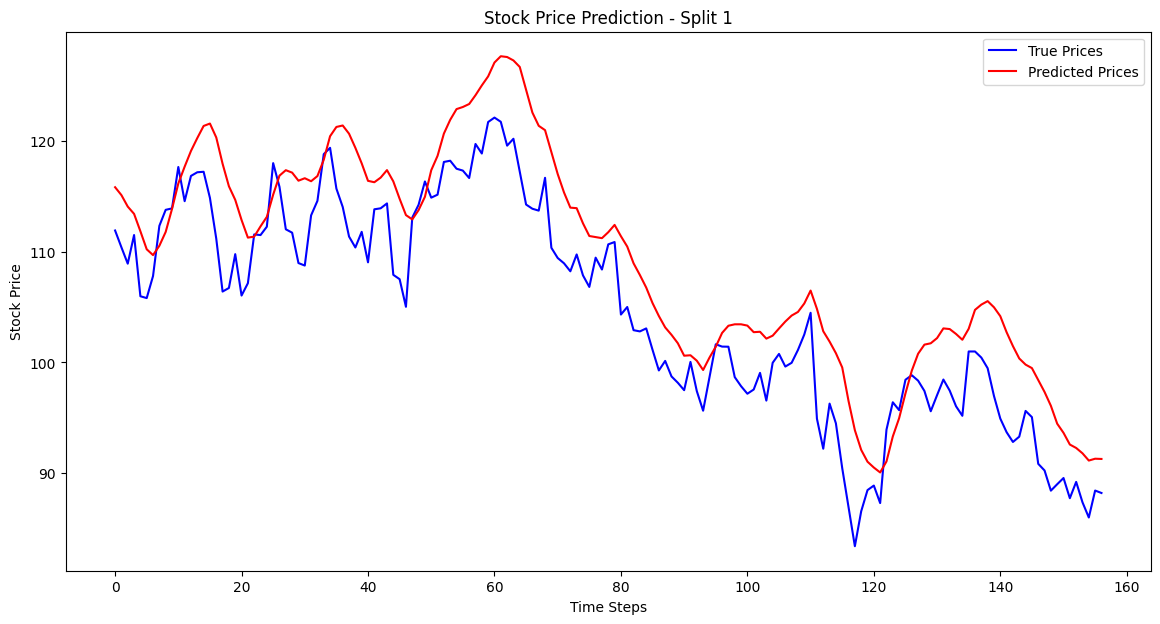

Split 1: MSE: 28.8872923383576, RMSE: 5.37468997602258, MAE: 4.687912619037992, R²: 0.6937441178104293


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")